<a href="https://colab.research.google.com/github/Devika-es/Currency-Converter/blob/main/ml2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

file_path = '/content/shopping_trends_updated.csv'
data = pd.read_csv(file_path)


data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant numerical columns
numerical_columns = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
numerical_data = data[numerical_columns]

print(numerical_data.isnull().sum())

numerical_data = numerical_data.fillna(numerical_data.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Convert scaled data back to a DataFrame for easy viewing
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_df.head()


Age                      0
Purchase Amount (USD)    0
Review Rating            0
Previous Purchases       0
dtype: int64


,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,0.718913,-0.285629,-0.907584,-0.785831
1,-1.648629,0.178852,-0.907584,-1.616552
2,0.390088,0.558882,-0.907584,-0.162789
3,-1.517099,1.276716,-0.349027,1.637107
4,0.061263,-0.454531,-1.466141,0.391025


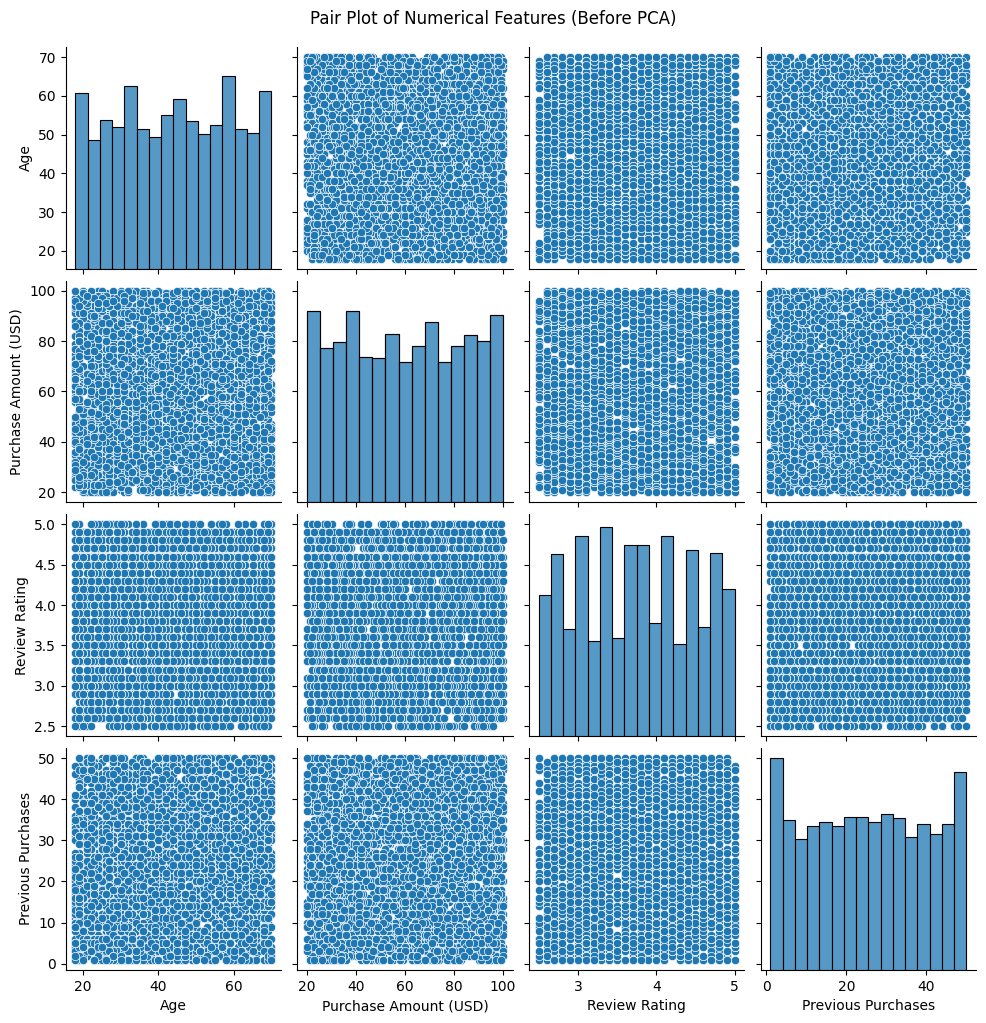

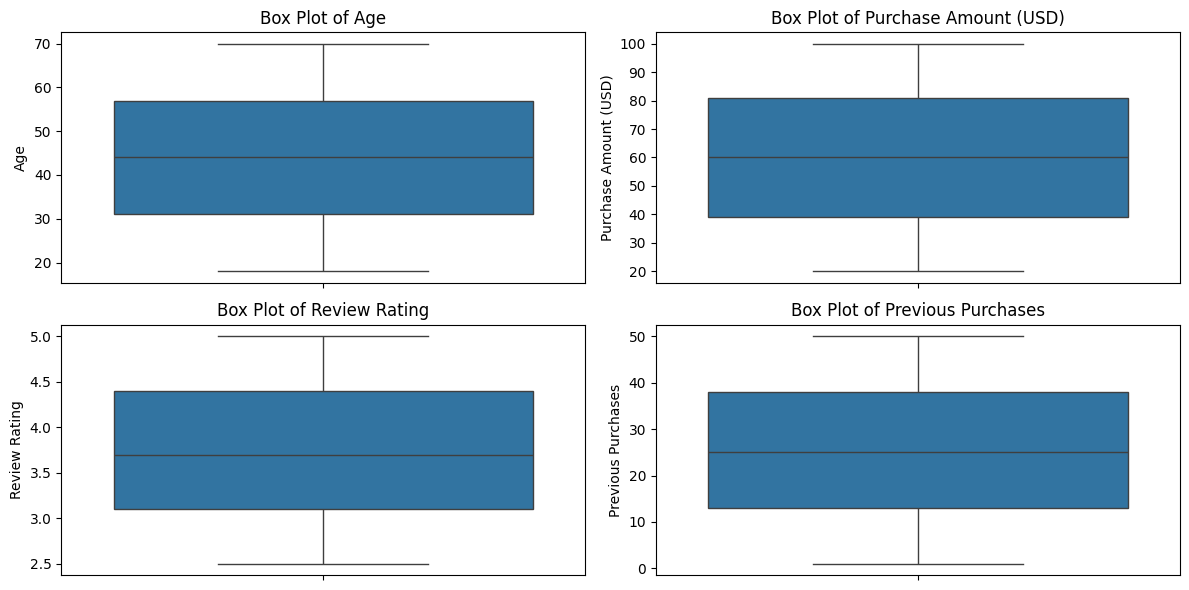

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical features for visualization
features_to_visualize = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Create pair plots to visualize relationships between features
sns.pairplot(data[features_to_visualize])
plt.suptitle('Pair Plot of Numerical Features (Before PCA)', y=1.02)
plt.show()

# Create box plots to visualize the distribution of each feature
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

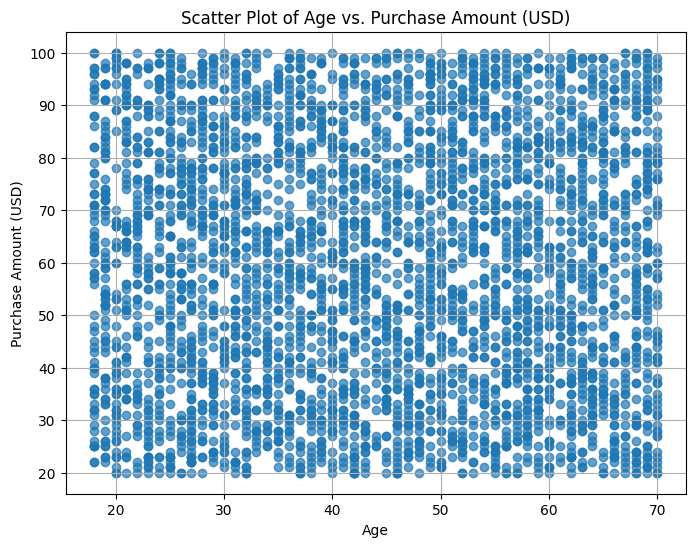

In [ ]:
import matplotlib.pyplot as plt

# Select two features for the scatter plot (e.g., 'Age' and 'Purchase Amount (USD)')
feature_x = 'Age'
feature_y = 'Purchase Amount (USD)'

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data[feature_x], data[feature_y], alpha=0.7)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title('Scatter Plot of {} vs. {}'.format(feature_x, feature_y))
plt.grid(True)
plt.show()

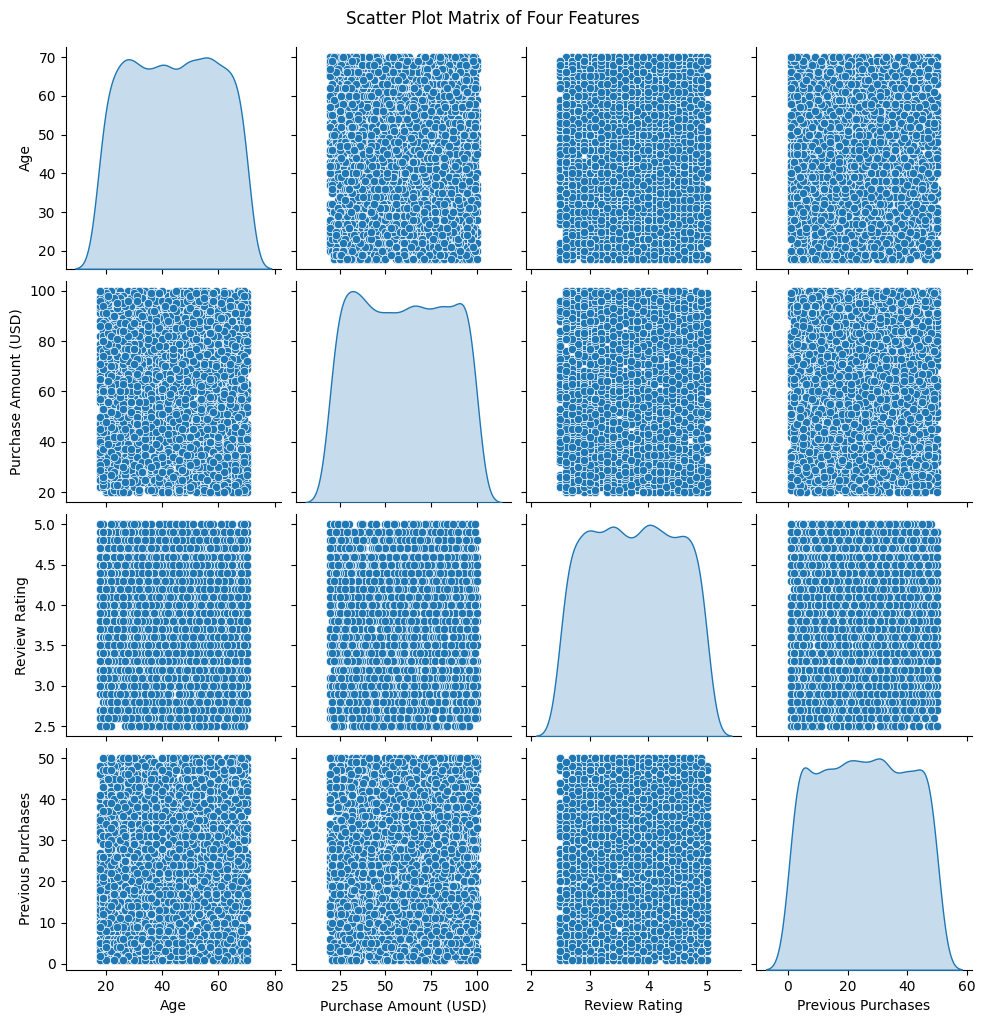

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select four features for the scatter plot
features = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']

# Create the scatter plot matrix
sns.pairplot(data[features], diag_kind='kde')  # Use kde for diagonal plots
plt.suptitle('Scatter Plot Matrix of Four Features', y=1.02)
plt.show()

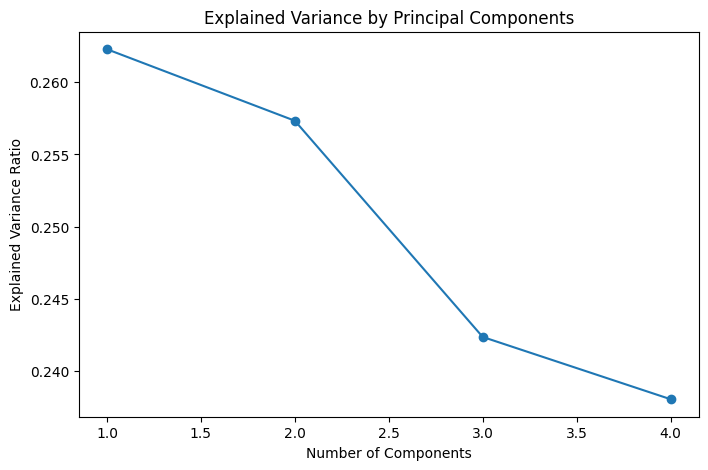

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA and fit the standardized data
pca = PCA()
pca.fit(scaled_data)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance to determine the optimal number of components
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()


In [ ]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert the PCA-transformed data to a DataFrame for easy visualization
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
pca_df.head()


,PC1,PC2
0,0.679571,-0.875270
1,-1.410280,-1.771317
2,0.420109,-0.106255
3,-0.587576,1.135377
4,1.097818,-0.705935


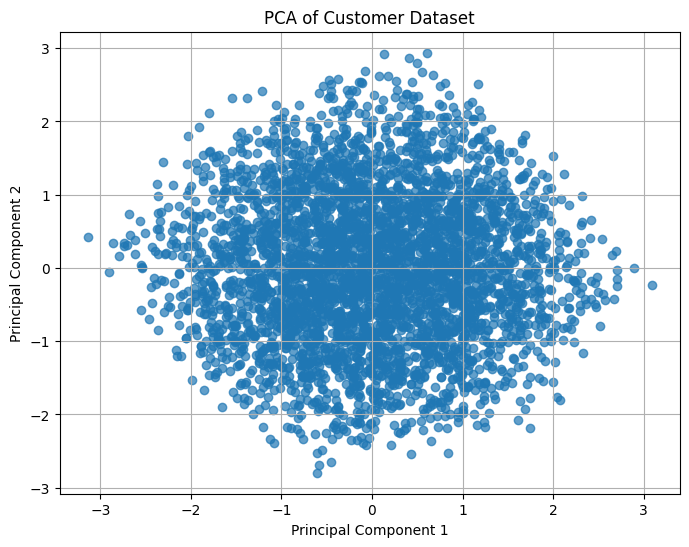

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Dataset')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np


pca_df['Distance_from_Origin'] = np.sqrt(pca_df['PC1']**2 + pca_df['PC2']**2)


threshold = pca_df['Distance_from_Origin'].mean() + 2 * pca_df['Distance_from_Origin'].std()

# Filter for potential anomalies
anomalies = pca_df[pca_df['Distance_from_Origin'] > threshold]
print("Number of anomalies detected:", len(anomalies))
anomalies


Number of anomalies detected: 84


,PC1,PC2,Distance_from_Origin
78,-0.141113,2.531627,2.535557
342,2.704822,-0.024362,2.704932
413,0.603792,2.937850,2.999254
415,2.671523,-0.426590,2.705368
457,-1.543385,2.318066,2.784864
...,...,...,...
3540,-2.617480,0.194375,2.624687
3581,-1.376701,2.324107,2.701255
3655,-0.586365,-2.693453,2.756540
3676,-2.690133,0.742262,2.790657


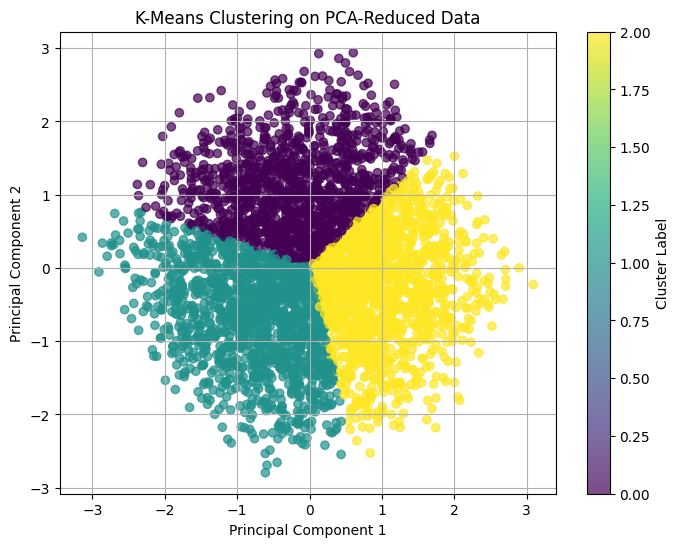

In [ ]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['KMeans_Cluster'] = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['KMeans_Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


In [ ]:

customer_data_with_clusters = pd.concat([pca_df[['KMeans_Cluster']], scaled_df.reset_index(drop=True)], axis=1)

# Calculate the mean of each feature for each cluster
cluster_means = customer_data_with_clusters.groupby('KMeans_Cluster').mean()
print("Cluster Means:\n", cluster_means)


Cluster Means:
                      Age  Purchase Amount (USD)  Review Rating  \
KMeans_Cluster                                                   
0               0.159991               0.720302       0.634634   
1              -0.730734              -0.104132       0.038376   
2               0.623117              -0.563740      -0.634306   

                Previous Purchases  
KMeans_Cluster                      
0                         0.564461  
1                        -0.763324  
2                         0.279189  


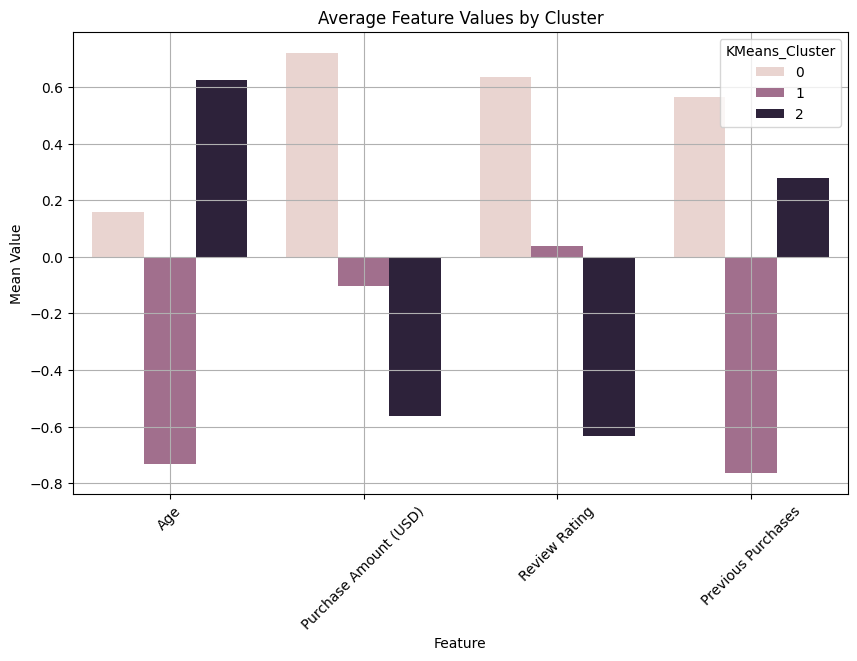

In [ ]:
import seaborn as sns

# Melt the data for easy plotting
cluster_means_melted = cluster_means.reset_index().melt(id_vars='KMeans_Cluster', var_name='Feature', value_name='Mean Value')

# Plot the average values of each feature by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted, x='Feature', y='Mean Value', hue='KMeans_Cluster')
plt.title('Average Feature Values by Cluster')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Access cluster centers from the KMeans model
cluster_centers = kmeans.cluster_centers_

# Print cluster centers
print("Cluster Centers:\n", cluster_centers)

# Print unique cluster labels in the data
print("Unique Cluster Labels in Data:\n", pca_df['KMeans_Cluster'].unique())


Cluster Centers:
 [[-0.22644446  1.1027198 ]
 [-0.79333776 -0.70545728]
 [ 1.05128329 -0.28418045]]
Unique Cluster Labels in Data:
 [2 1 0]


In [ ]:
# Calculate distance with integer-safe indexing
pca_df['Distance_from_Center'] = pca_df.apply(
    lambda row: np.sqrt((row['PC1'] - cluster_centers[int(row['KMeans_Cluster'])][0])**2 +
                        (row['PC2'] - cluster_centers[int(row['KMeans_Cluster'])][1])**2),
    axis=1
)


In [ ]:

# Calculate mean and standard deviation of distances for each cluster
cluster_distance_stats = pca_df.groupby('KMeans_Cluster')['Distance_from_Center'].agg(['mean', 'std']).reset_index()

# Define a distance threshold for anomalies (e.g., 2 standard deviations from the mean)
threshold_multiplier = 2
anomalies_within_clusters = pca_df.merge(cluster_distance_stats, on='KMeans_Cluster')
anomalies_within_clusters = anomalies_within_clusters[
    anomalies_within_clusters['Distance_from_Center'] >
    (anomalies_within_clusters['mean'] + threshold_multiplier * anomalies_within_clusters['std'])
]

# Display the number of anomalies detected within clusters
print("Number of anomalies within clusters:", len(anomalies_within_clusters))
anomalies_within_clusters[['PC1', 'PC2', 'KMeans_Cluster', 'Distance_from_Center']]


Number of anomalies within clusters: 164


,PC1,PC2,KMeans_Cluster,Distance_from_Center
5,0.948349,-1.967482,2,1.686445
6,1.508999,1.580090,0,1.799902
19,1.400672,1.695763,0,1.731822
24,-0.231308,-2.345525,1,1.733696
42,-2.225405,0.328525,1,1.766334
...,...,...,...,...
3725,-2.909347,-0.054374,1,2.213911
3761,1.130859,-2.001037,2,1.718699
3799,1.632654,-1.810299,2,1.633105
3859,1.624184,1.471057,2,1.846368


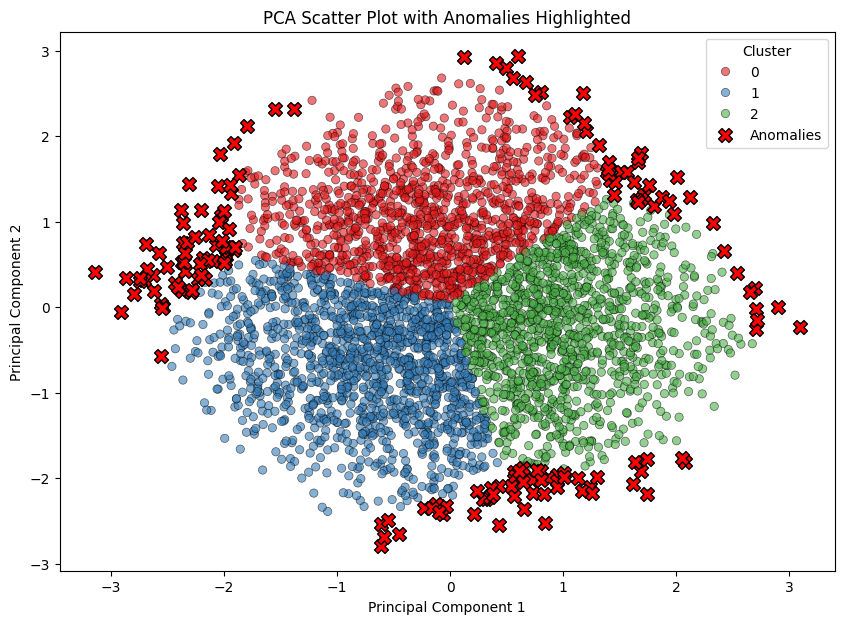

In [ ]:
# Visualize Anomalies on the PCA Scatter Plot

import matplotlib.pyplot as plt
import seaborn as sns

# First, plot the main PCA scatter plot with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='KMeans_Cluster',
    palette='Set1',
    alpha=0.6,
    edgecolor='k'
)

# Overlay anomalies as a separate scatter plot layer with a distinct marker and color
plt.scatter(
    anomalies_within_clusters['PC1'],
    anomalies_within_clusters['PC2'],
    color='red',
    marker='X',
    s=100,
    edgecolor='k',
    label='Anomalies'
)

# Add title, labels, and legend
plt.title('PCA Scatter Plot with Anomalies Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# Print Key Findings
print("=== Project Summary ===")
print(f"Number of clusters found: {pca_df['KMeans_Cluster'].nunique()}")
print(f"Number of anomalies detected: {len(anomalies_within_clusters)}")

# Display the average distance from the center for each cluster (to understand cluster spread)
print("\nAverage distance from center for each cluster:")
print(cluster_distance_stats[['KMeans_Cluster', 'mean']])

# Display the number of anomalies in each cluster
print("\nNumber of anomalies per cluster:")
anomalies_per_cluster = anomalies_within_clusters['KMeans_Cluster'].value_counts()
print(anomalies_per_cluster)


=== Project Summary ===
Number of clusters found: 3
Number of anomalies detected: 164

Average distance from center for each cluster:
   KMeans_Cluster      mean
0               0  0.847476
1               1  0.859186
2               2  0.837346

Number of anomalies per cluster:
KMeans_Cluster
1    58
2    56
0    50
Name: count, dtype: int64
